# Import Libraries

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [4]:
df = pd.read_csv('titanic_passengers.csv', sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


## Checking the data

In [12]:
df.shape

(891, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
df.sample

<bound method NDFrame.sample of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                               

In [20]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploratory Data Analysis

In [23]:
def outlier_check(row, colname):
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier

outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    outliers_in_col = outlier_check(df, col)
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,117,No,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
1,281,No,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
2,852,No,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
3,457,No,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
4,55,No,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
381,436,Yes,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
382,337,No,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
383,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
384,558,No,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [25]:
print("Missing Value (%)")

missing_values = df.isna().mean() * 100
print(missing_values)

Missing Value (%)
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [27]:
print("\nDuplicate Rows (%):")

duplicate_count = df.duplicated().mean()
print(duplicate_count)


Duplicate Rows (%):
0.0


In [29]:
val = {'Survived': {'Yes': 1, 'No': 0}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}, 'Sex': {'male': 1, 'female': 0}, 'Name': {'Mr.': 1, 'Mrs.': 0, 'Miss.': 0}}
df.replace(val, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,0.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,0.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,0.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1.0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,NaN,1.0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,NaN,0.0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,349215,7.8958,NaN,0.0


## Visualization

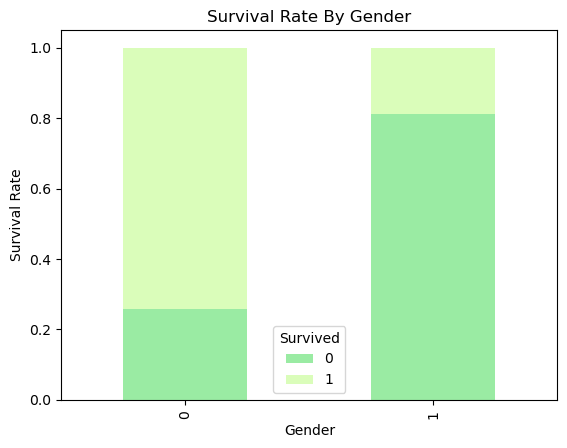

In [32]:
gen_surv = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
gen_surv.plot(kind='bar', stacked=True, color=['#9AEBA3', '#DAFDBA'])
plt.title('Survival Rate By Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=90)
plt.show()

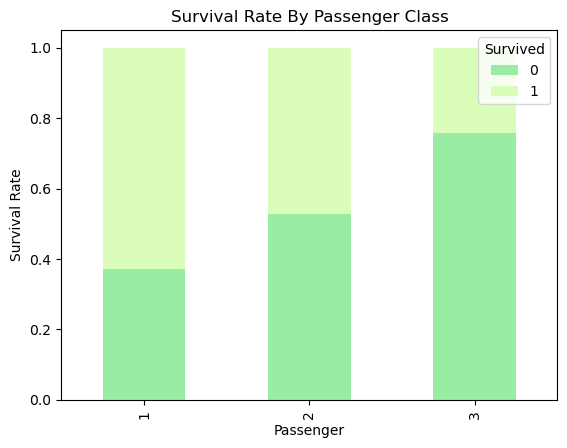

In [34]:
class_surv = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
class_surv.plot(kind='bar', stacked=True, color=['#9AEBA3', '#DAFDBA'])
plt.title('Survival Rate By Passenger Class')
plt.xlabel('Passenger')
plt.ylabel('Survival Rate')
plt.xticks(rotation=90)
plt.show()

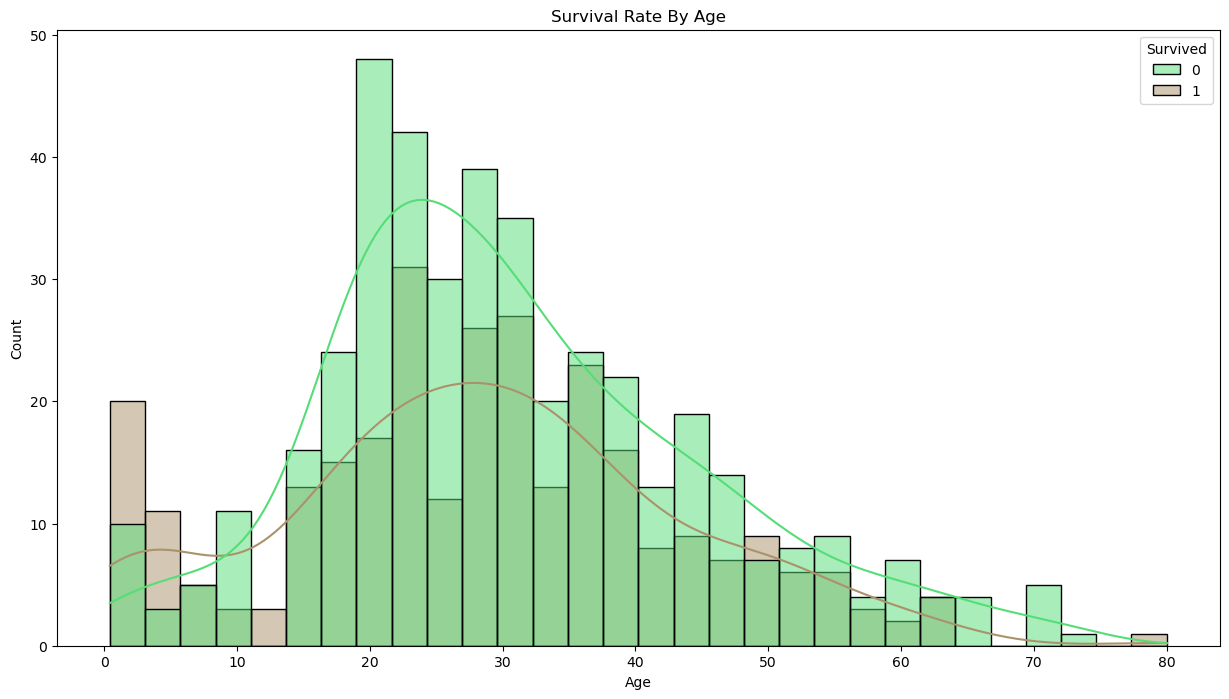

In [36]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='terrain', bins=30)
plt.title('Survival Rate By Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

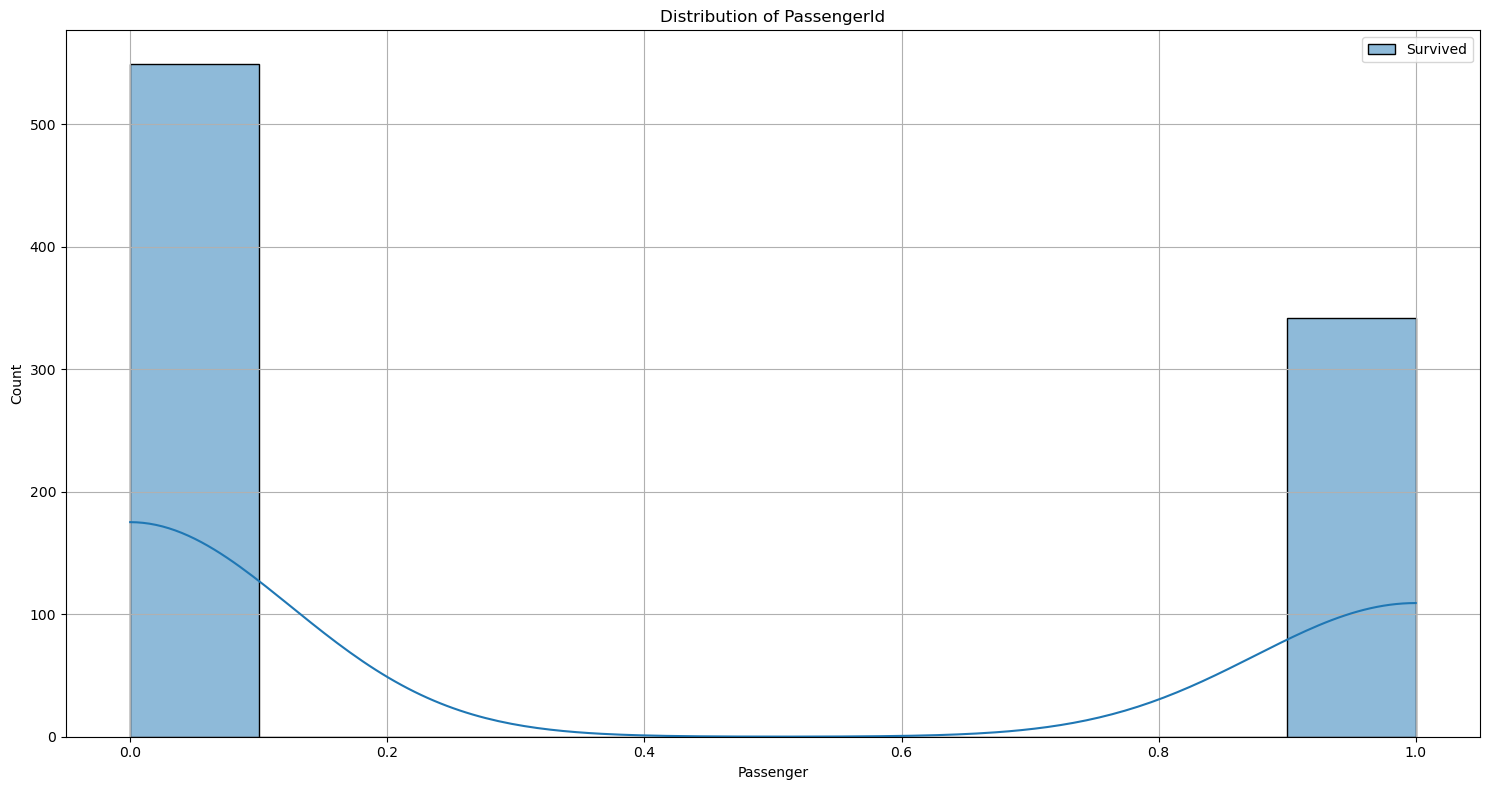

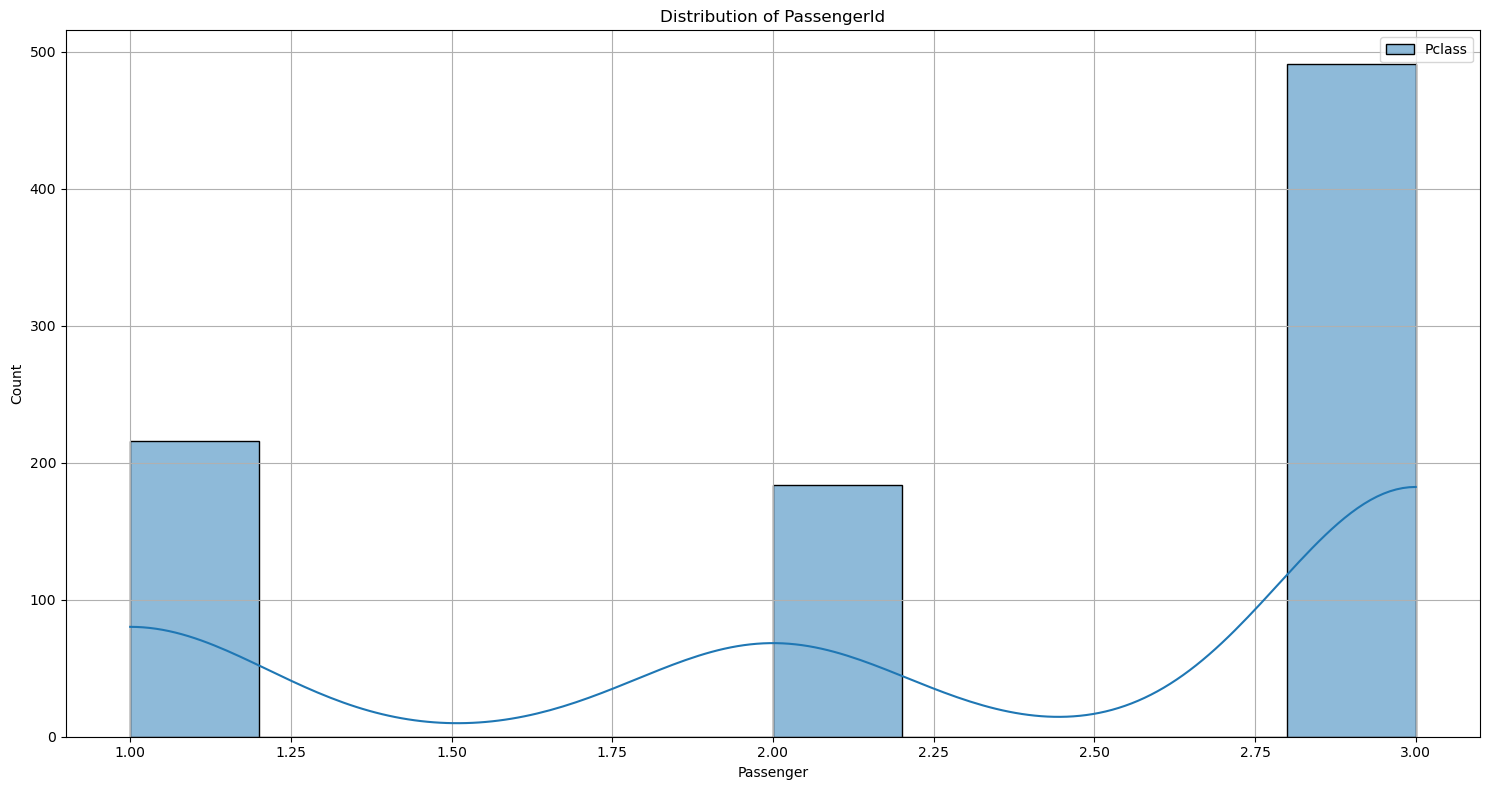

In [57]:
for PassengerId in df.columns[1:3]:
    plt.figure(figsize=(15, 8))
    sns.histplot(df[[PassengerId]], kde=True, color='terrain', bins=10)
    plt.title('Distribution of PassengerId')
    plt.xlabel('Passenger')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.grid()
    plt.show()

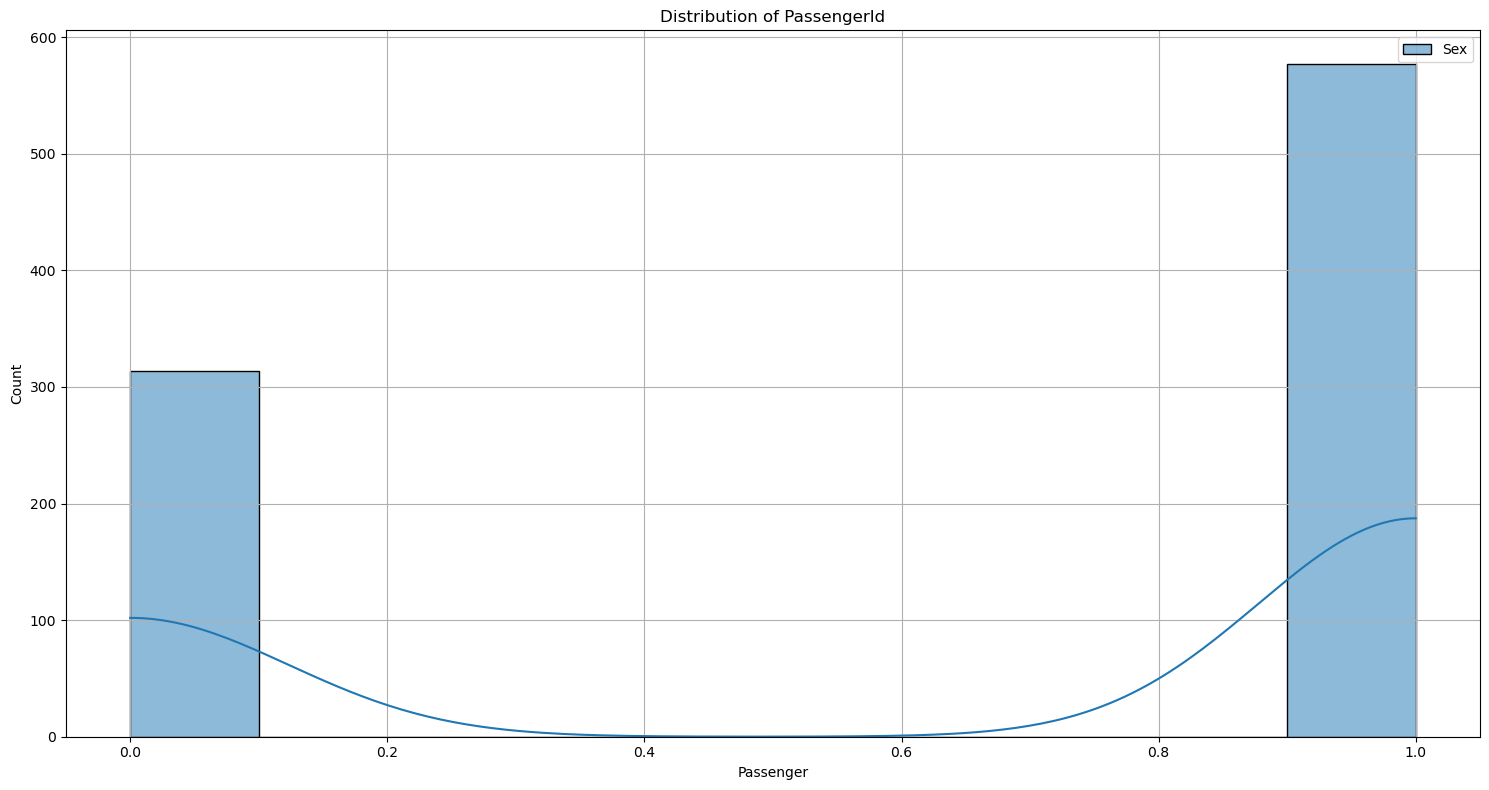

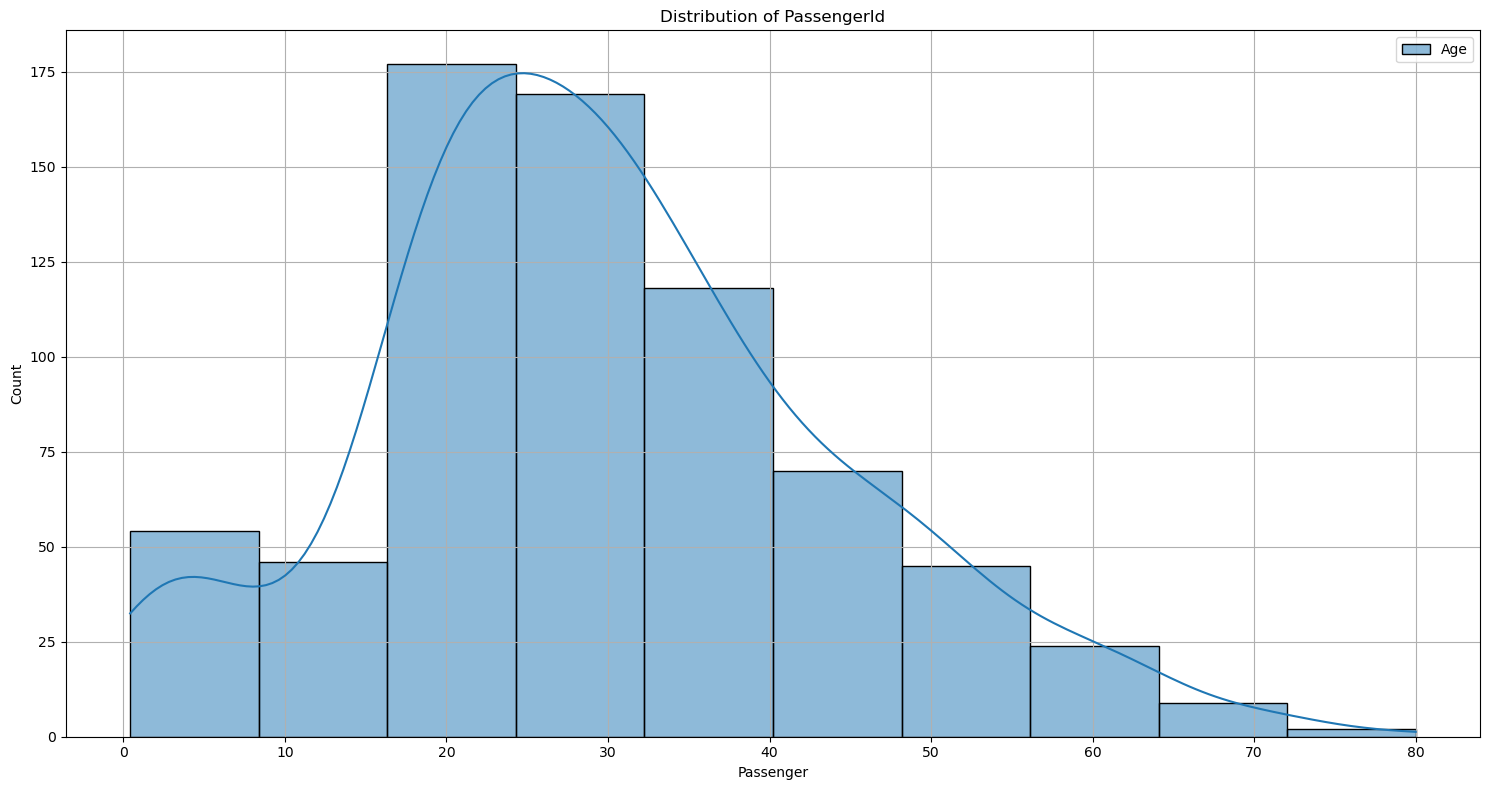

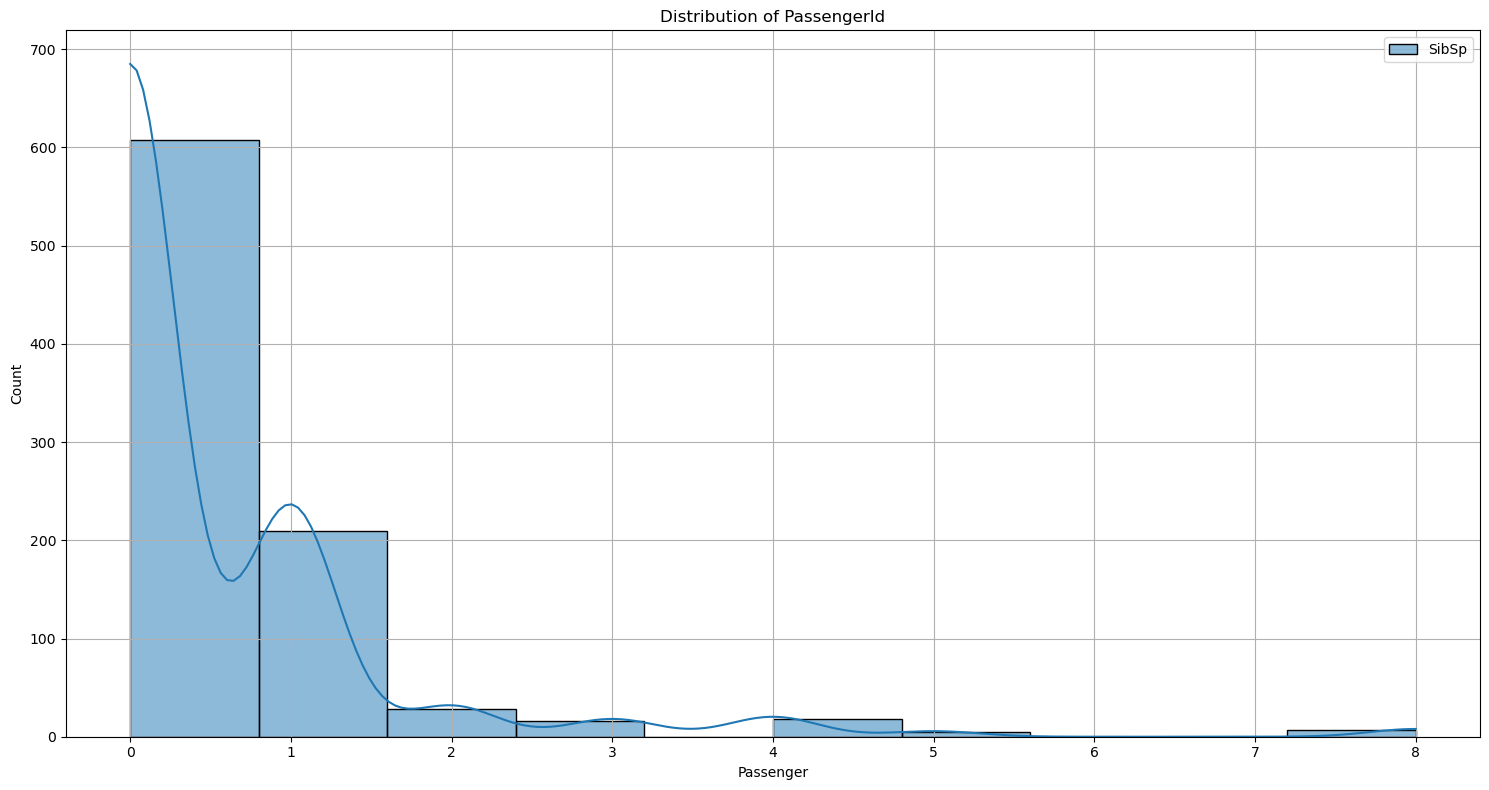

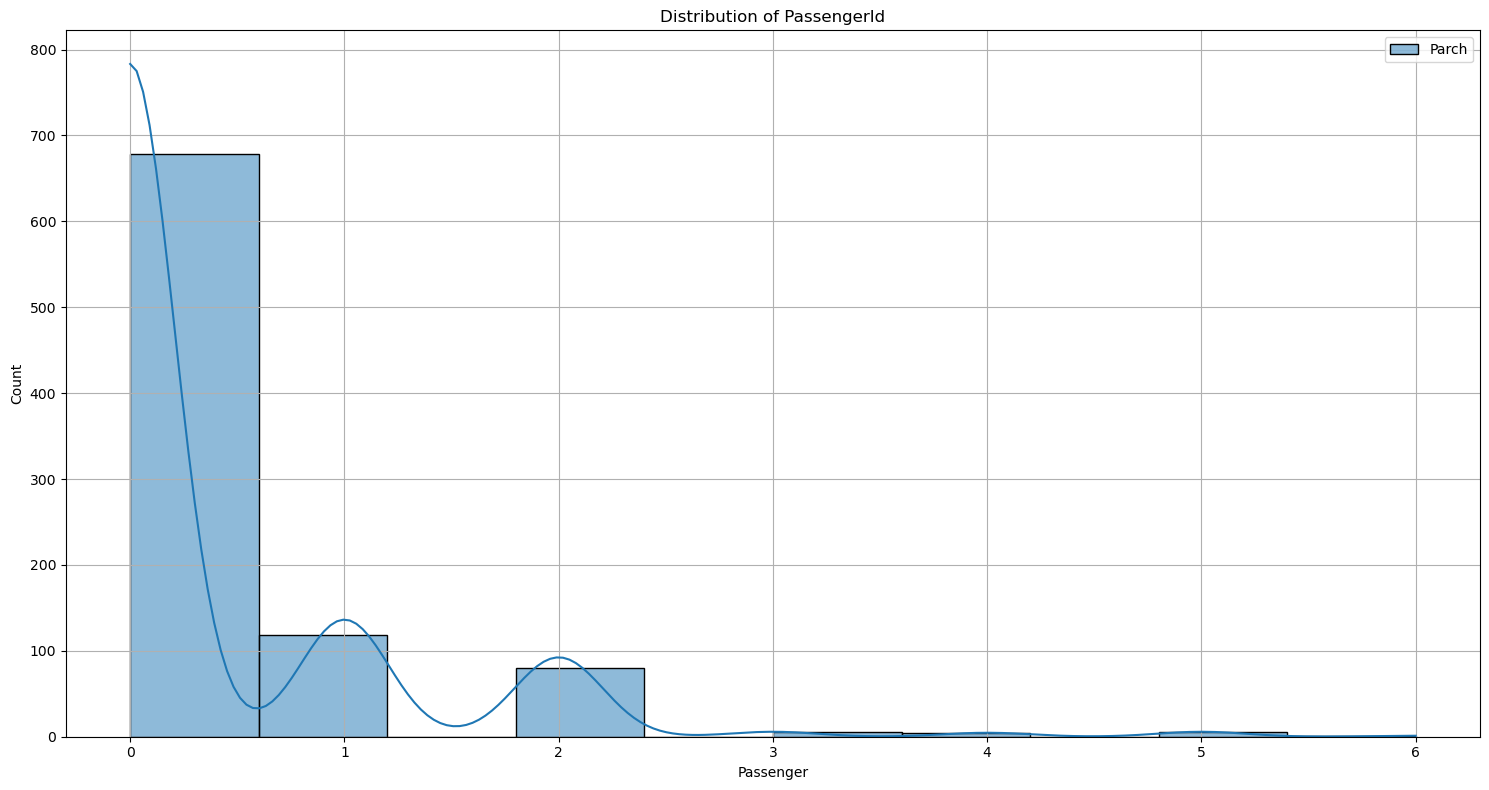

In [63]:
for PassengerId in df.columns[4:8]:
    plt.figure(figsize=(15, 8))
    sns.histplot(df[[PassengerId]], kde=True, color='terrain', bins=10)
    plt.title('Distribution of PassengerId')
    plt.xlabel('Passenger')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.grid()
    plt.show()

In [67]:
features_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(features_remove, axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.0,0,0,13.0000,0.0
1,0,3,1,25.0,0,0,7.6500,0.0
2,0,3,1,20.0,0,0,7.8542,0.0
3,0,3,0,29.0,0,4,21.0750,0.0
4,0,1,1,31.0,1,0,52.0000,0.0
...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,1.0
887,0,3,1,22.0,0,0,7.2292,1.0
888,0,3,0,30.0,0,0,8.6625,0.0
889,0,3,1,NaN,0,0,7.8958,0.0


<Figure size 2000x1000 with 0 Axes>

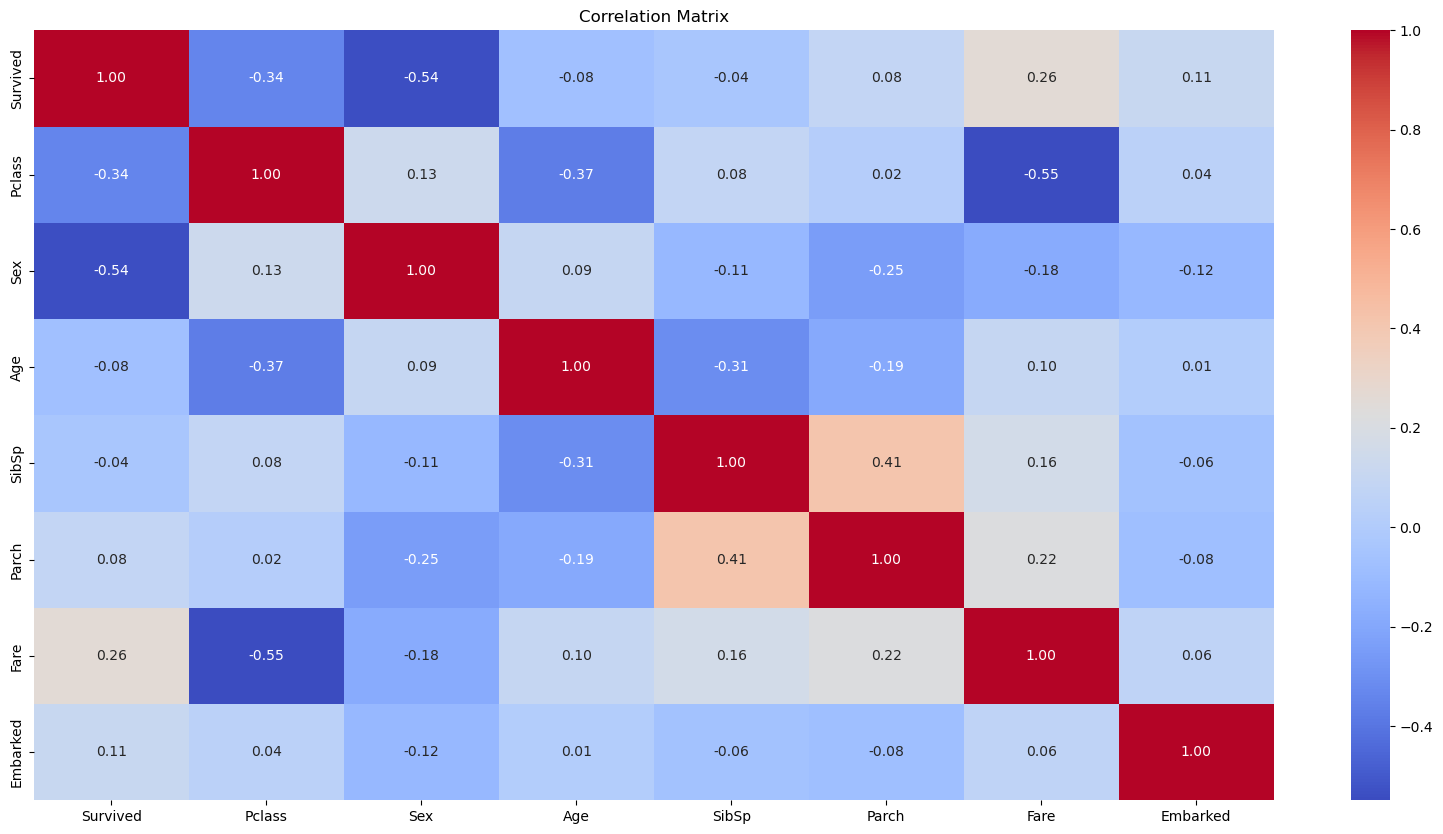

In [69]:
plt.figure(figsize=(20, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predective Modeling

### Label Encoder

In [109]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [78]:
label_mappings = {}

In [115]:
for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f'Column: {col}')
    for label, code in mapping.items():
        print('f {code} -> {label}')
        print()

### Train Test Split

In [96]:
X = df.drop('Fare', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


### Random Forest Classifier

In [103]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [105]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [107]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

1.0

### Standard Scaler

In [120]:
scaler = StandardScaler()
scaler

StandardScaler()

In [122]:
scaler.fit(X_train)

StandardScaler()

### Logistic Regression

In [129]:
model = LogisticRegression()
model

LogisticRegression()